# The XOR Problem
The XOR, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOR logic gates given two binary inputs. An XOR function should return a true value if the two inputs are not equal and a false value if they are equal. All possible inputs and predicted outputs are shown in figure 1.

XOR is a classification problem and one for which the expected outputs are known in advance. It is therefore appropriate to use a supervised learning approach.

# Imports

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime

# Creating our own data

In [2]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

## KNN Model

In [3]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

# Visualizing data 

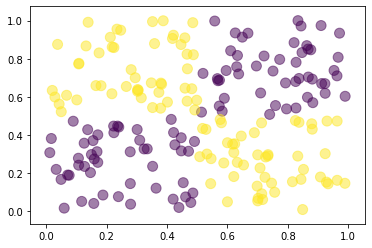

In [4]:
X,Y=get_xor()
plt.scatter(X[:,0],X[:,1],s=100,c=Y,alpha=0.5)
plt.show()

# Fitting the data to the model

In [5]:
model=KNN(3)
model.fit(X,Y)
print ("accuracy: ",model.score(X,Y))

accuracy:  0.995
